# Notebook 3 — Dashboard

This notebook creates a simple dashboard-style set of visualisations using 
the cleaned datasets and the results from forecasting and clustering. 
These figures are used in the final report.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = (10,4)

PROCESSED = Path("../data/processed")
FIGS = Path("../figures"); FIGS.mkdir(exist_ok=True)

def save_fig(name: str):
    plt.tight_layout()
    plt.savefig(FIGS / f"{name}.png", dpi=300)

# Load main datasets
df_import = pd.read_csv(PROCESSED/"import_dependency_clean.csv")

# Optional files
fc_path = PROCESSED/"forecast_ie.csv"
clu_path = PROCESSED/"clusters.csv"
df_forecast = pd.read_csv(fc_path) if fc_path.exists() else None
clusters = pd.read_csv(clu_path) if clu_path.exists() else None


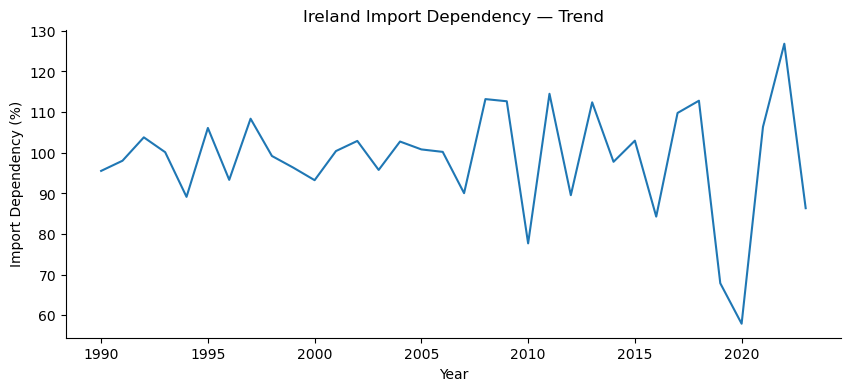

<Figure size 1000x400 with 0 Axes>

In [2]:
ie = df_import[df_import["geo"]=="IE"].groupby("year", as_index=False)["value"].mean()
plt.plot(ie["year"], ie["value"])
plt.title("Ireland Import Dependency — Trend")
plt.xlabel("Year"); plt.ylabel("Import Dependency (%)")
for s in ["top","right"]: plt.gca().spines[s].set_visible(False)
plt.grid(False); plt.show()
save_fig("dash_ie_trend")


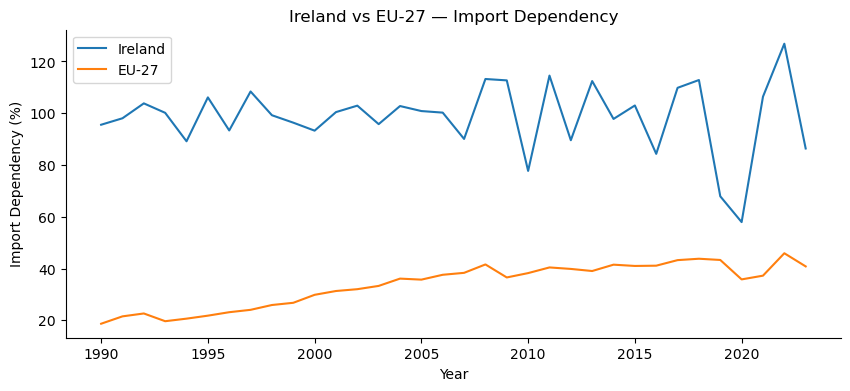

<Figure size 1000x400 with 0 Axes>

In [3]:
eu = df_import[df_import["geo"]=="EU27_2020"].groupby("year", as_index=False)["value"].mean()
plt.plot(ie["year"], ie["value"], label="Ireland")
plt.plot(eu["year"], eu["value"], label="EU-27")
plt.title("Ireland vs EU-27 — Import Dependency")
plt.xlabel("Year"); plt.ylabel("Import Dependency (%)")
plt.legend()
for s in ["top","right"]: plt.gca().spines[s].set_visible(False)
plt.grid(False); plt.show()
save_fig("dash_ie_vs_eu27")


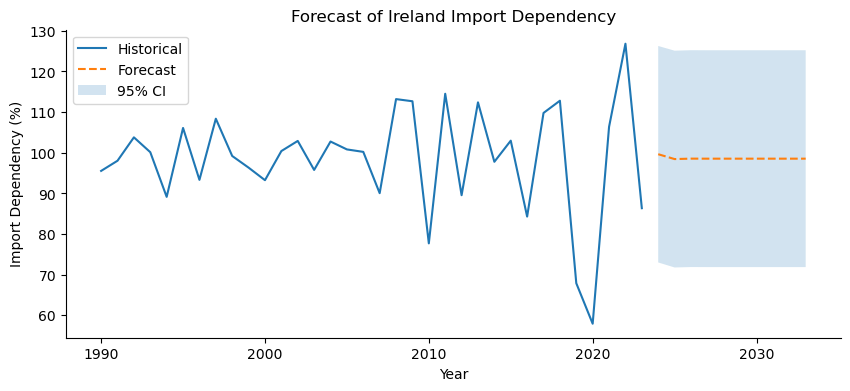

<Figure size 1000x400 with 0 Axes>

In [4]:
if df_forecast is not None:
    plt.plot(ie["year"], ie["value"], label="Historical")
    plt.plot(df_forecast["year"], df_forecast["forecast"], "--", label="Forecast")
    plt.fill_between(df_forecast["year"], df_forecast["lower"], df_forecast["upper"], alpha=0.2, label="95% CI")
    plt.title("Forecast of Ireland Import Dependency")
    plt.xlabel("Year"); plt.ylabel("Import Dependency (%)")
    plt.legend()
    for s in ["top","right"]: plt.gca().spines[s].set_visible(False)
    plt.grid(False); plt.show()
    save_fig("dash_forecast_ie")
else:
    print("No forecast file found — skipping forecast plot.")


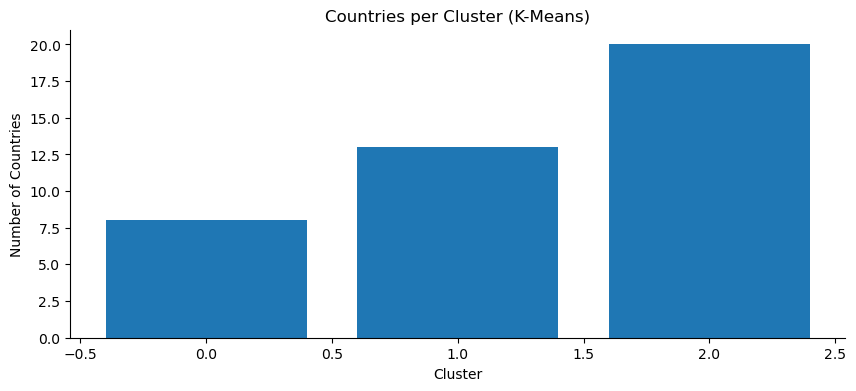

<Figure size 1000x400 with 0 Axes>

In [5]:
if clusters is not None:
    counts = clusters["cluster"].value_counts().sort_index()
else:
    # Fallback: quick recompute if file missing
    pivot = df_import.pivot_table(index="geo", columns="year", values="value")
    pivot = pivot.dropna(thresh=10).T.fillna(pivot.mean()).T
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    X = StandardScaler().fit_transform(pivot)
    pivot["cluster"] = KMeans(n_clusters=3, random_state=42).fit_predict(X)
    counts = pivot["cluster"].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.title("Countries per Cluster (K-Means)")
plt.xlabel("Cluster"); plt.ylabel("Number of Countries")
for s in ["top","right"]: plt.gca().spines[s].set_visible(False)
plt.grid(False); plt.show()
save_fig("dash_cluster_counts")


## Dashboard Summary

This dashboard presents the main outputs of the analysis:

- Ireland’s long-term import dependency trend  
- Comparison with EU-27  
- Forecast of future dependency  
- Clustering of EU countries  

These visualisations support the final recommendations and narrative 
presented in the written report.
